# Asset Pricing Models and Its Application in Python
## Abdullah Karasan

Financial investment decision is a function of risk and return, which are positively related to each other. Investor tries to obtain highest possible return while mitigating the risk as much as possible. So, in a nutshell, investor tend to invest in an asset with best risk-return combination. But the question is how can we estimate the best risk-return combination?

This lesson tries to tackle this question using two celebrated models. In this part of the lesson, we will discuss the two prominent models about asset valuation: 
* Capital Asset Pricing Model
* Arbitrage Pricing Theorem

## 1. Capital Asset Pricing Model (CAPM) 

It is an easy task to measure return of an asset, which is nothing but a change in an asset's value based on previous period. How about risk? It is exactly where `Markowitz's Portfolio Theory`comes into the picture. Markowitz's article titled ["Portfolio Selection"](https://www.math.ust.hk/~maykwok/courses/ma362/07F/markowitz_JF.pdf) provides a clear definition of what had hitherto been unambiguous. 

This trade-off is defined as the selection problem of the portfolio mean and variance of the assets, and given the risk level the theory has suggested that high expected return should be selected. Expected return and risk are given as follows:

$$ \text{Expected Return}=\mathbb{E}(R_i)$$
$$\text{Risk}=\sigma (R_i)$$

where $R_i$ is the return of ith asset and $\mathbb{E}$ denotes expectation operator, and $\sigma$ represents the standard deviation of return. Thus, standard deviation is assumed to be a risk of an asset and this approach paves the way for further analysis.

Starting with Markowitz's contribution, risk-return relationship of an asset is well-founded as new approaches emerges. Of these approaches. Capital Asset Pricing Model is the one of the most prominents one.

The CAPM is based on the idea that the individual investor can make a combination between the borrower portfolios and the lender portfolios, to organize his own risk and to create an optimal portfolio among the risky assets. CAPM, suggested by [Sharpe (1964)](http://efinance.org.cn/cn/fm/Capital%20Asset%20Prices%20A%20Theory%20of%20Market%20Equilibrium%20under%20Conditions%20of%20Risk.pdf), [Lintner (1965)](http://www.empirical.net/wp-content/uploads/2014/12/Lintner-The-Valuation-of-Risk-Assets-and-the-Selection-of-Risky-Investments-in-Stock-Portfolios-and-Capital-Budgets.pdf), and [Black (1972)](http://www.stat.ucla.edu/~nchristo/statistics_c183_c283/fischer_black_trace_out.pdf) , is a model investigating the systematic risk and return in a competitive market. 

As we have discussed, the primary motivation of an investor in forming a best risk-return portfolio is to mitigate the risk while having highest return but it is not possible to make all risks go away. That is to say, there are some risks that an investor can mitigate and some he/she cannot. By diversification, which is simply forming a portfolio with assets having high risk-return relationship and with assets having low risk-return relationship, the risk can be reduced to certain level. But what is this level?

In order to better understand and handle the risk in finance, we need to differentiate it:
* Systematic Risk: It is the that cannot be disappeared by diversification. Therefore it is also referred to as `non-diversifiable risk`.  More specifically, random fluctuations in the value of an asset can be balanced out by holding diverse assets. Some systematic risks are:
    * Interest rate risk
    * Inflation risk
    * Market risk

* Unsystematic Risk: It is the risk that can be mitigated through diversification. That is random fluctuations in the value of the asset can be balanced out by holding many different assets. Unsystematic risk arises from Stock-specific issues. Some unsystematic risks can be listed as:
    * Business risk: Any Internal weakness of a company can jeopardize its profitability
    * Financial risk: Change in capital structure allocation of a company
    * Entrance of a new competitor

CAPM examines the systematic risk ($\beta$) and expected return in a competitive market. It is a parametric and univariate approach. The ultimate aim of this method is to price an individual security or a portfolio. Let's now talk about the components and the formula of CAPM:

$$\mathbb{E}(R_i)=\alpha_i+\beta_i\mathbb{E}(R_m)$$

where
 * $R_i$: Expected excess return of the $i^{th}$ stock
 * $\alpha_i$: asset’s return\loss coming from technical analysis
 * $R_m$: Expected excess market return
 * $\beta_{i}$: Slope coefficient
 

Here, excess return represents the portion of an individual stock or market return above the `risk free rate`. Or it can be formulated as:

$$\mathbb{E}(R_i)=\mathbb{E}(r_i)-r_f$$

where $r_f$ is risk free rate and $r_i$ is the individual stock return. So, excess return checks if an asset yields  larger return than a safe asset. If so, it is a motivation to invest, otherwise, investor prefer to invest in a safe asset whose return is low but guaranteed.

The result, denoted as $`\mathbb{E}(R_i)`$, is also the required return or discount rate used in valuing an asset or a project that we discuss in NPV lesson:

Required Rate of Return = Risk Free Rate of Return + Beta*(Market Return – Risk Free Rate of Return)

We need to put special emphasize on $\beta$, which shows the extent to which an investment adds risk to a portfolio. Put differently, it is a measure of systematic risk of a stock in comparison to the market. It is also indicates the correlation between individual stock and market: 



* If the $\beta$>1, stock is riskier than the benchmark market
* If the $\beta$=1, stock is as riskier as the benchmark market
* If the $\beta$<1, stock is as less riskier as than the benchmark market

Hence, beta coefficient indicates the ratio between the covariance of individual stock return and market return and the stock market return variance:

$$\beta_i = \frac{\text{Cov}(r_i, r_m)}{\text{Var}(r_m)}$$

In econometrical approach, CAPM can be defined as:

$$
r_i-r_f= \alpha_i + \beta_{i}(\mathbb{E}(r_m)-r_f) + \epsilon_i
$$

where
 * $\epsilon_i$: Error term

The CAPM provides insights about `Security Market Line` (SML) and `Capital Market Line` (CML). The CML illustrates rate of return for a single set of optimal portfolio shown below:

<img src="assets/CML.png" alt="Capital Market Line" style="width:200;height:400px;">

Source: `Mastering Python for Finance` Weiming (2015)

The dots we see in the `CML`graph above represents security return. Asset return locating above the CML represent high return-risk ratio. On the other hand, asset returns, below the CML, implies low return-risk ratio. So, it would be a wise to invest in an asset above the `CML` line. 

`SML`, on the other hand, exhibits the linear relationship between expected asset returns and betas obtained from CAPM. All the correctly priced securities are plotted on the SML. If the assets lie above the SML line, the assets are undervalued due to the higher return for a given amount of risk. Conversely, the assets lie below the SML are overvalued because it return of this stock is lower for a given amount of risk.

<img src="assets/SML.png" alt="Security Market Line" style="width:100;height:300px;">

**Source:** Shapiro, Foundations of Finance

Enough theory, let's begin the empirical part. First step, as always, is to import the necessary Python libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import warnings
import yfinance as yf
import seaborn as sns; sns.set()
yf.pdr_override() 
%matplotlib inline
warnings.filterwarnings('ignore')

 In this part, instead of visiting a website and downloading the data to our local computer, we directly access to `yahoo finance` and retrieve the data as  we have learned in the previous lesson. To compare the performance of the companies, we will run CAPM analyses with three difference companies operating in telecomunication sector. These companies are `Comcast`, `AT&T`,`Verizon` and the market these stocks are listed is S&P-500. We use tickers to retreive data from yahoo finance:
 * CMCSA: Comcast
 * T: AT&T
 * VZ: Verizon
 * ^GSPC: S&P-500

The analysis covers the business day for the period of 01-01-2016 and 01-01-2020 with monthly stock price data.

In [2]:
stocks = ['CMCSA','T','VZ','^GSPC']
start = datetime.datetime(2016,1,1)
end = datetime.datetime(2020,1,1)
stock_prices = yf.download(stocks,start=start,end = end, interval='1mo')

[*********************100%***********************]  4 of 4 downloaded


In [3]:
stock_prices.head()

Adj Close                         Close                         \
               CMCSA      T     VZ    ^GSPC  CMCSA      T     VZ    ^GSPC   
Date                                                                        
2016-01-01     25.56  28.15  40.90  1940.24  27.85  36.06  49.97  1940.24   
2016-01-04       NaN    NaN    NaN      NaN    NaN    NaN    NaN      NaN   
2016-02-01     26.60  29.25  42.03  1932.23  28.86  36.95  50.73  1932.23   
2016-03-01     28.15  31.01  44.81  2059.74  30.54  39.17  54.08  2059.74   
2016-04-01     28.00  30.73  42.20  2065.30  30.38  38.82  50.94  2065.30   

             High         ...    Low            Open                         \
            CMCSA      T  ...     VZ    ^GSPC  CMCSA      T     VZ    ^GSPC   
Date                      ...                                                 
2016-01-01  28.02  36.06  ...  43.79  1812.29  27.58  34.08  45.67  2038.20   
2016-01-04    NaN    NaN  ...    NaN      NaN    NaN    NaN    NaN      NaN   
2016-02-01  29.85  37.50  ...  49.27  1810.10  27.53  36.04  49.94  1936.94   
2016-03-01  30.68  39.72  ...  50.98  1937.09  29.11  37.10  50.99  1937.09   
2016-04-01  31.45  39.36  ...  49.47  2033.80  30.30  38.67  53.32  2056.62   

                 Volume                                          
                  CMCSA            T           VZ         ^GSPC  
Date                                                             
2016-01-01  532587400.0  677721800.0  416446100.0  9.240977e+10  
2016-01-04          NaN          NaN          NaN           NaN  
2016-02-01  608842000.0  577261900.0  379201400.0  9.304956e+10  
2016-03-01  400644600.0  508161600.0  298263500.0  9.263942e+10  
2016-04-01  425409600.0  452326800.0  312846700.0  8.112499e+10  

[5 rows x 24 columns]

In [4]:
stock_prices=stock_prices['Close']

In [5]:
stock_prices.dropna(inplace=True)

Summary statistics is a very first step to explore the dataset. Main statistics such as mean, standard deviation, minimum, maximum etc., can be calculated via `.describe()` in Python. Initial observation tells us that the price level and volatility (represented by standard deviation) of S&P-500 is quite different from the rest of the stocks.

In [6]:
stock_prices.describe()

,CMCSA,T,VZ,^GSPC
count,48.000000,48.000000,48.000000,48.000000
mean,37.152708,36.334167,52.736667,2560.539167
std,4.647971,3.898660,4.405864,337.100990
min,27.850000,28.540000,44.660000,1932.230000
25%,33.507500,32.605000,49.265000,2268.860000
50%,37.480000,37.165000,52.155000,2612.855000
75%,40.490000,39.097500,55.935000,2818.170000
max,45.080000,43.290000,61.400000,3230.780000


As the caret sign `^` in the ticker of S&P-500 might cause problem in coding, I prefer rename this column before proceeding:

In [7]:
stock_prices=stock_prices.rename({'^GSPC':'GSPC'}, axis='columns')

Visualization is quite helpful in understanding what the data looks like. So, as a first step, it is encouraged to plot the data and increase the awareness about it. Aside from the AT&T, what we see in the below-given plots are stock prices follow a volatile path with upward trend. Stock price of AT&T, on the other hand, declines dramatically and then recovered.

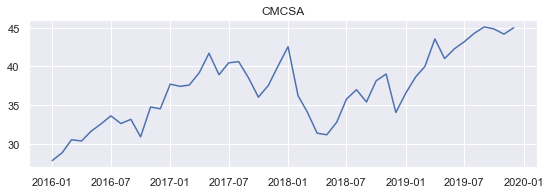

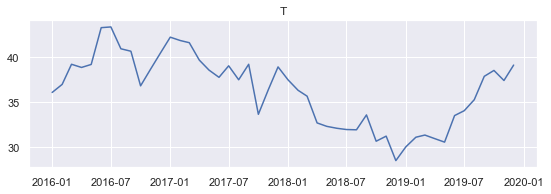

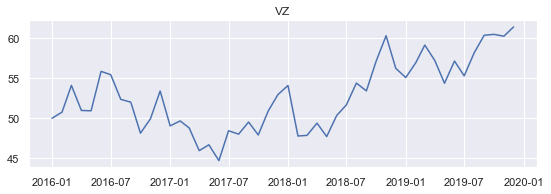

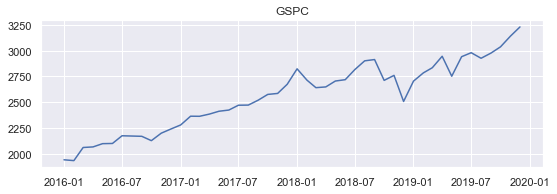

In [8]:
k=1
for i in range(0, len(stock_prices.columns)):
    sns.set
    plt.figure(figsize=(15, 5))
    plt.subplot(2, 2, k)
    plt.plot(stock_prices[stock_prices.columns[i]])
    plt.title("{}".format(stock_prices.columns[i]))
    k+=1
    plt.tight_layout()
    plt.show()
    

Correlation coefficient tells us the extent to which variables are related. `Correlation matrix` is a tool to calculate and visualize the correlation coefficients among the variables of interest. The most striking observation is the correlation coefficient of 76% between Comcast and S&P-500 indicating that there is a high correlation between these two variables. However, it is not the case for AT&T and Verizon whose correlation coefficients with S&P-500 are -52% and 55%, respectively.

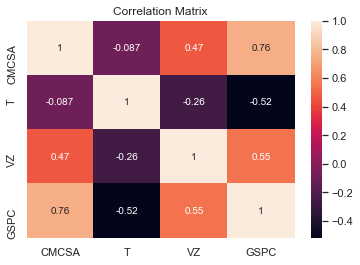

In [9]:
heat_corr=stock_prices.corr()
sns.heatmap(heat_corr, annot=True)
plt.title("Correlation Matrix")
plt.show()

As CAPM requires stock returns, there are various ways to calculate return in Python but `.pct_change()` is one of the most easyto-apply function. Once we calculate the return first row becomes `nan` as return for the first entry cannot be computed.

In [10]:
returns=stock_prices.pct_change()
returns.dropna(inplace=True)
returns.head()

,CMCSA,T,VZ,GSPC
Date,,,,
2016-02-01,0.036266,0.024681,0.015209,-0.004128
2016-03-01,0.058212,0.060081,0.066036,0.065991
2016-04-01,-0.005239,-0.008935,-0.058062,0.002699
2016-05-01,0.041804,0.008501,-0.000785,0.015325
2016-06-01,0.030016,0.103704,0.097053,0.000911


Now, after having the return for three stock and one market index, extracting risk free rate allows us to compute excess return. To access the risk free rate data, we use `Fred API` as we have learned previosly. Please note that there is no single risk free rate, different researchers apply different risk free rate but the common property of these rates is that they are issued by a government, which makes them safe heaven to invest. Here, we select `3-Month Treasury Constant Maturity Rate`, which is short-term T-Bill with relatively low and safe return.

In [11]:
from fredapi import Fred
fred = Fred(api_key='Insert Your API key here')# or you can use my API key: 78b14ec6ba46f484b94db43694468bb1

In [12]:
fred.search('risk free')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
DGS10,DGS10,2020-06-22,2020-06-22,10-Year Treasury Constant Maturity Rate,1962-01-02,2020-06-18,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2020-06-19 15:25:33-05:00,96,For further information regarding treasury con...
GS10,GS10,2020-06-22,2020-06-22,10-Year Treasury Constant Maturity Rate,1953-04-01,2020-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2020-06-01 15:21:01-05:00,76,Averages of business days. For further informa...
WGS10YR,WGS10YR,2020-06-22,2020-06-22,10-Year Treasury Constant Maturity Rate,1962-01-05,2020-06-12,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2020-06-15 15:21:04-05:00,65,Averages of business days. For further informa...
DGS1,DGS1,2020-06-22,2020-06-22,1-Year Treasury Constant Maturity Rate,1962-01-02,2020-06-18,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2020-06-19 15:25:30-05:00,80,For further information regarding treasury con...
GS1,GS1,2020-06-22,2020-06-22,1-Year Treasury Constant Maturity Rate,1953-04-01,2020-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2020-06-01 15:24:45-05:00,60,Averages of business days. For further informa...
WGS1YR,WGS1YR,2020-06-22,2020-06-22,1-Year Treasury Constant Maturity Rate,1962-01-05,2020-06-12,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2020-06-15 15:22:12-05:00,57,Averages of business days. For further informa...
DGS30,DGS30,2020-06-22,2020-06-22,30-Year Treasury Constant Maturity Rate,1977-02-15,2020-06-18,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2020-06-19 15:26:05-05:00,77,Yields on actively traded non-inflation-indexe...
DGS5,DGS5,2020-06-22,2020-06-22,5-Year Treasury Constant Maturity Rate,1962-01-02,2020-06-18,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2020-06-19 15:25:58-05:00,76,For further information regarding treasury con...
GS5,GS5,2020-06-22,2020-06-22,5-Year Treasury Constant Maturity Rate,1953-04-01,2020-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2020-06-01 15:25:01-05:00,56,Averages of business days. For further informa...


In [13]:
risk_free=fred.get_series('GS3M')
risk_free=risk_free['2016-01-01':'2019-12-31']
rf=risk_free.pct_change()

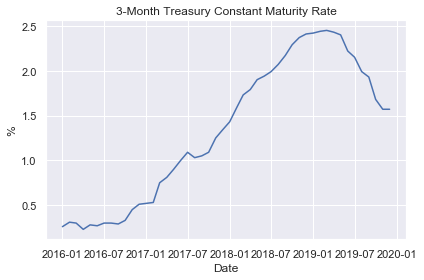

In [14]:
plt.plot(risk_free)
plt.xlabel('Date')
plt.ylabel('%')
plt.title('3-Month Treasury Constant Maturity Rate')
plt.tight_layout()

plt.show()

To calculate the excess return, we need to subtract risk free rate from the stock returns. We calculate and stor all excess return in data frame named `returns`.

In [15]:
stocks=["CMCSA","T","VZ","GSPC"]
for i in stocks:
    returns["excess_return_"+str(i)]=returns[i]-rf

In [16]:
returns.head()

,CMCSA,T,VZ,GSPC,excess_return_CMCSA,excess_return_T,excess_return_VZ,excess_return_GSPC
Date,,,,,,,,
2016-02-01,0.036266,0.024681,0.015209,-0.004128,-0.156042,-0.167627,-0.177099,-0.196436
2016-03-01,0.058212,0.060081,0.066036,0.065991,0.090470,0.092339,0.098294,0.098249
2016-04-01,-0.005239,-0.008935,-0.058062,0.002699,0.228094,0.224398,0.175271,0.236033
2016-05-01,0.041804,0.008501,-0.000785,0.015325,-0.175587,-0.208891,-0.218177,-0.202067
2016-06-01,0.030016,0.103704,0.097053,0.000911,0.065730,0.139418,0.132767,0.036625


We are ready to run the CAPM analysis after all these preparation process. First, we run the CAPM analysis for Comcast and it turns out that Comcast is less volatile than the S&P-500 as we have a beta coefficient of 0.8944. This estimated beta coefficient is statistically significant at 1% level since we have a t-value of 15.164 (or p-value of 0.0000). However, the intercept term is not statistically significant. Therefore, interpretation of the intercept term, which indicates the performance of the technical analysis, does not make sense.

In [17]:
import statsmodels.api as sm

In [18]:
y_cmsa=returns['excess_return_CMCSA']
X=returns['excess_return_GSPC']

In [19]:
X= sm.add_constant(X, prepend=False)
CAPM_CMSA= sm.OLS(y_cmsa, X)
CAPM_results_CMSA = CAPM_CMSA.fit()

In [20]:
CAPM_results_CMSA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     excess_return_CMCSA   R-squared:                       0.836
Model:                             OLS   Adj. R-squared:                  0.833
Method:                  Least Squares   F-statistic:                     230.0
Date:                 Mon, 22 Jun 2020   Prob (F-statistic):           2.65e-19
Time:                         20:13:17   Log-Likelihood:                 76.538
No. Observations:                   47   AIC:                            -149.1
Df Residuals:                       45   BIC:                            -145.4
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     0.9350      0.062     15.164      0.000       0.811       1.059
const                 -0.0017      0.007     -0.226      0.822      -0.016       0.013
==============================================================================
Omnibus:                        1.609   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.447   Jarque-Bera (JB):                0.787
Skew:                           0.023   Prob(JB):                        0.675
Kurtosis:                       3.632   Cond. No.                         8.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

When it comes to AT&T, the result is quite similar in terms of slope coefficien $\beta$ and intercept term. The beta coefficient of 0.9781 implies that there is a correlation between excess market return and excess return of the AT&T. More specifically, 1-unit increase in S&P-500 leads to an increase in AT&T return by nearly 0.97. Again, the intercept term is not statistically significant at conventional confidence interval.

In [21]:
y_T=returns['excess_return_T']

In [22]:
X = sm.add_constant(X, prepend=False)
CAPM_T= sm.OLS(y_T, X)
CAPM_results_T = CAPM_T.fit()

In [23]:
CAPM_results_T.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        excess_return_T   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     259.2
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           2.72e-20
Time:                        20:13:20   Log-Likelihood:                 77.232
No. Observations:                  47   AIC:                            -150.5
Df Residuals:                      45   BIC:                            -146.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     0.9781      0.061     16.098      0.000       0.856       1.100
const                 -0.0091      0.007     -1.255      0.216      -0.024       0.006
==============================================================================
Omnibus:                        5.934   Durbin-Watson:                   2.339
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                5.507
Skew:                          -0.489   Prob(JB):                       0.0637
Kurtosis:                       4.363   Cond. No.                         8.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Verizon does tell us a similar story with positive and statistically significant beta coefficient and statistically insignificant intercept term. The magnitude of beta coefficient is 0.9345 indicating that 1-unit increase in S&P-500 results in an increase of 0.93 in Verizon return.

In [24]:
y_VZ=returns['excess_return_VZ']

In [25]:
X = sm.add_constant(X, prepend=False)
CAPM_VZ= sm.OLS(y_VZ, X)
CAPM_results_VZ = CAPM_VZ.fit()

In [26]:
CAPM_results_VZ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       excess_return_VZ   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     219.4
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           6.42e-19
Time:                        20:13:23   Log-Likelihood:                 75.463
No. Observations:                  47   AIC:                            -146.9
Df Residuals:                      45   BIC:                            -143.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     0.9345      0.063     14.813      0.000       0.807       1.062
const                 -0.0080      0.008     -1.066      0.292      -0.023       0.007
==============================================================================
Omnibus:                        2.199   Durbin-Watson:                   2.318
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.457
Skew:                           0.417   Prob(JB):                        0.483
Kurtosis:                       3.220   Cond. No.                         8.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
CAPM_results_VZ.params[0]

0.9344985589626482

In summary, considering the estimated beta coefficients, the most and least responsive or volatile stock is AT&T and Verizon, respectively.

As a final note, I would like to name a few pros and cons of CAPM approach:

**Pros**

* Ease of use

* Diversified Portfolio: The assumption that investors have a diversified portfolio similar to the market portfolio eliminates the non-systematic (specific) risk.

* CAPM takes into account systematic risk

* CAPM can be used as a model to account for the business and financial Risk variability

**Cons**

* The proxy used for risk free rate  is subject to change and open to discussion.
* A risk-free borrowing capability is far from being realistic
* Using CAPM to evaluate an investment must find a suitable beta for the project or investment to correctly evaluate it.

# <font color=blue> 2. Arbitrage Pricing Theorem (APT) </font>

Despite all merits that CAPM has, it is not free from critism some of which are listed above. Stephen Ross 1976 attempted to address these critics and propose `Arbitrage Pricing Theorem` (APT), which is based on the identifying various systematic risk factors, which is rather appealing in that it is not realistic to assume that single systematic risk factor affects stock returns. However, inclusion of sources of macroeconomic variable can provide us a better understanding about the stock returns. So, the main goal of APT is to improve portfolio performance by better understanding portfolio creation and evaluation. 

The Arbitrage Pricing Model was proposed by Stephen Ross and predicts the relationship between the return of the portfolio and the return of a single asset through several independent macroeconomic variables. The APT has following assumptions (Bodie et al.(2008)):

* Security returns can be described by a factor model;
* There are sufficient securities to diversify away idiosyncratic risk; and
* Well-functioning security markets do not allow for the persistence of arbitrage opportunities.

We can generalize the APT model as follows:

$$\begin{equation}
r_i- r_f = \alpha_i + \beta_{im}(r_m-r_f) +...+ \beta_{ij}(r_j-r_f)  + \epsilon_i
\end{equation}$$

where
 * $r_i$: Expected return of the $i^{th}$ stock
 * $\alpha_i$: asset’s return coming from technical analysis
 * $r_m$ and $r_j$: common risk factors
 * $a_{im}$: systematic factor of $m^{th}$ factor
 * $\epsilon_i$: Error term 

Now, the question is how do we find the proper macroeconomic factors? We are looking for some important risk factor that raise the concern of the investors.

[Chen, Roll and Ross (1986)]('https://pdfs.semanticscholar.org/08d9/21ea5c119ea770194bce73f726adf5614daa.pdf?_ga=2.9307062.284215294.1589479012-1597751336.1589479012') address this issue by listing following variables:

* Inflation rate
* Growth rate in industrial production
* Term structure
* Spread between high-grade and low-grade bond
* Real interest rate
* Oil prices

Having listed some relevant variables, we are now able to run the APT analysis. We could proceed by retrieving the data first. Again, we refer to the relate APIs to extract these data. Thanks to `Yahoo Finance` and `FRED`, we have stock prices, risk free rate, and stock market index (S&P-500) from the preceding part.

Following the finding of Chen, Roll and Ross (1986),  `industrial production`, `changes in inflation`, `stock market index` will be our independent variables as they have appeared to explain a significant portion of the time-series variability of stock returns.

At this point, to extract the macroeconomic variable, `FRED API` is a convenient database:

In [28]:
from fredapi import Fred
fred = Fred(api_key='78b14ec6ba46f484b94db43694468bb1')

In [29]:
fred.search('industrial')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
INDPRO,INDPRO,2020-06-22,2020-06-22,Industrial Production Index,1919-01-01,2020-05-01,Monthly,M,Index 2012=100,Index 2012=100,Seasonally Adjusted,SA,2020-06-16 08:24:02-05:00,88,The Industrial Production Index (INDPRO) is an...
IPMAN,IPMAN,2020-06-22,2020-06-22,Industrial Production: Manufacturing (NAICS),1972-01-01,2020-05-01,Monthly,M,Index 2012=100,Index 2012=100,Seasonally Adjusted,SA,2020-06-16 08:25:34-05:00,65,None
IPGMFN,IPGMFN,2020-06-22,2020-06-22,Industrial Production: Manufacturing (NAICS),1972-01-01,2020-05-01,Monthly,M,Index 2012=100,Index 2012=100,Not Seasonally Adjusted,NSA,2020-06-16 08:25:40-05:00,30,The industrial production (IP) index measures ...
DJIA,DJIA,2020-06-22,2020-06-22,Dow Jones Industrial Average,2010-06-21,2020-06-19,Daily,D,Index,Index,Not Seasonally Adjusted,NSA,2020-06-19 19:01:03-05:00,79,The observations for the Dow Jones Industrial ...
BUSLOANS,BUSLOANS,2020-06-22,2020-06-22,"Commercial and Industrial Loans, All Commercia...",1947-01-01,2020-05-01,Monthly,M,Billions of U.S. Dollars,Bil. of U.S. $,Seasonally Adjusted,SA,2020-06-19 15:48:16-05:00,75,"For further information, please refer to the B..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NLDPROINDQISMEI,NLDPROINDQISMEI,2020-06-22,2020-06-22,Production of Total Industry in Netherlands,1960-01-01,2020-01-01,Quarterly,Q,Index 2015=100,Index 2015=100,Seasonally Adjusted,SA,2020-06-12 09:52:33-05:00,2,"Copyright, 2016, OECD. Reprinted with permissi..."
MAMANNGSP,MAMANNGSP,2020-06-22,2020-06-22,Gross Domestic Product by Industry: Private In...,1997-01-01,2019-01-01,Annual,A,Millions of Dollars,Mil. of $,Not Seasonally Adjusted,NSA,2020-04-07 17:03:26-05:00,2,For more information about this release go to ...
A34HNO,A34HNO,2020-06-22,2020-06-22,Value of Manufacturers' New Orders for Durable...,1992-02-01,2020-04-01,Monthly,M,Million of Dollars,Mil. of $,Seasonally Adjusted,SA,2020-06-03 09:01:10-05:00,15,None


In [30]:
ind=fred.get_series('INDPRO')
ind=ind['2016-01-01':'2019-12-31']

To be consistent, I drop the first observation in industrial production index as we calculate return from stock prices, first month is dropped. Besides, to deal with the scaling issue, I take the logarithm of the data:

In [34]:
ind.head()

2016-01-01    102.9525
2016-02-01    102.2225
2016-03-01    101.4155
2016-04-01    101.5167
2016-05-01    101.4298
dtype: float64

In [31]:
log_ind=np.log(ind.iloc[1:])

In [32]:
fred.search('potential inflation')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIEHOUSE,CPIEHOUSE,2020-06-22,2020-06-22,Experimental Consumer Price Index: Housing,1982-12-01,2020-05-01,Monthly,M,Index 1982=100,Index 1982=100,Seasonally Adjusted,SA,2020-06-10 10:07:02-05:00,8,There are several limitations in the experimen...
CPIEALL,CPIEALL,2020-06-22,2020-06-22,Experimental Consumer Price Index: All Items,1982-12-01,2020-05-01,Monthly,M,Index 1982=100,Index 1982=100,Seasonally Adjusted,SA,2020-06-10 10:07:01-05:00,7,There are several limitations in the experimen...
CPIEMEDCARE,CPIEMEDCARE,2020-06-22,2020-06-22,Experimental Consumer Price Index: Medical Care,1982-12-01,2020-05-01,Monthly,M,Index 1982=100,Index 1982=100,Seasonally Adjusted,SA,2020-06-10 10:07:02-05:00,4,There are several limitations in the experimen...
CPIEBEV,CPIEBEV,2020-06-22,2020-06-22,Experimental Consumer Price Index: Food and Be...,1982-12-01,2020-05-01,Monthly,M,Index 1982=100,Index 1982=100,Seasonally Adjusted,SA,2020-06-10 10:07:02-05:00,4,There are several limitations in the experimen...
CPIETRANS,CPIETRANS,2020-06-22,2020-06-22,Experimental Consumer Price Index: Transportation,1982-12-01,2020-05-01,Monthly,M,Index 1982=100,Index 1982=100,Seasonally Adjusted,SA,2020-06-10 10:07:02-05:00,3,There are several limitations in the experimen...
CPIEAPPAREL,CPIEAPPAREL,2020-06-22,2020-06-22,Experimental Consumer Price Index: Apparel,1982-12-01,2020-05-01,Monthly,M,Index 1982=100,Index 1982=100,Seasonally Adjusted,SA,2020-06-10 10:07:02-05:00,3,There are several limitations in the experimen...
CPIECOMEDU,CPIECOMEDU,2020-06-22,2020-06-22,Experimental Consumer Price Index: Education a...,1993-01-01,2020-05-01,Monthly,M,Index 1982=100,Index 1982=100,Seasonally Adjusted,SA,2020-06-10 10:07:02-05:00,2,There are several limitations in the experimen...
CPIEOTRGS,CPIEOTRGS,2020-06-22,2020-06-22,Experimental Consumer Price Index: Other Goods...,1982-12-01,2020-05-01,Monthly,M,Index 1982=100,Index 1982=100,Seasonally Adjusted,SA,2020-06-10 10:07:02-05:00,1,There are several limitations in the experimen...
GDPPOT,GDPPOT,2020-06-22,2020-06-22,Real Potential Gross Domestic Product,1949-01-01,2030-10-01,Quarterly,Q,Billions of Chained 2012 Dollars,Bil. of Chn. 2012 $,Not Seasonally Adjusted,NSA,2020-02-07 14:49:01-06:00,75,Real potential GDP is the CBO’s estimate of th...


In [33]:
inf=fred.get_series('CPIEALL')
inf=inf['2016-01-01':'2019-12-31']

In [34]:
inf_rate=inf.pct_change().dropna()

We have completed data collection process and now we should combine all these variables into single data frame along the columns. Pandas' `concat` function does this for us and create a single data frame:

In [35]:
df_comcast=pd.concat([returns.excess_return_CMCSA, inf_rate,log_ind,returns.excess_return_GSPC], axis=1)
df_comcast=df_comcast.rename({0:'inf_rate',1:'log_ind'}, axis='columns')

In [36]:
df_comcast.head()

,excess_return_CMCSA,inf_rate,log_ind,excess_return_GSPC
2016-02-01,-0.156042,0.001655,4.627152,-0.196436
2016-03-01,0.090470,0.003670,4.619226,0.098249
2016-04-01,0.228094,0.004124,4.620223,0.236033
2016-05-01,-0.175587,0.003946,4.619367,-0.202067
2016-06-01,0.065730,0.003416,4.623744,0.036625


As we did before, assigning new variable to dependent and independent variables faciliates the regression analysis. `excess_return_CMCSA` is our dependent variable and it is labeled as y by convention. The rest of the variables are independent variables and they are labeled as `X_cmcsa`:

In [37]:
y=df_comcast['excess_return_CMCSA']
X_cmsa=df_comcast.iloc[:,1:]

In [38]:
X_cmsa= sm.add_constant(X_cmsa, prepend=False)
APT_CMSA= sm.OLS(y, X_cmsa)
APT_results_CMSA = APT_CMSA.fit()

In [39]:
APT_results_CMSA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     excess_return_CMCSA   R-squared:                       0.837
Model:                             OLS   Adj. R-squared:                  0.825
Method:                  Least Squares   F-statistic:                     73.35
Date:                 Mon, 22 Jun 2020   Prob (F-statistic):           6.00e-17
Time:                         20:13:43   Log-Likelihood:                 76.567
No. Observations:                   47   AIC:                            -145.1
Df Residuals:                       43   BIC:                            -137.7
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
inf_rate              -0.0142      4.239     -0.003      0.997      -8.563       8.535
log_ind                0.0573      0.265      0.216      0.830      -0.477       0.592
excess_return_GSPC     0.9308      0.070     13.373      0.000       0.790       1.071
const                 -0.2691      1.240     -0.217      0.829      -2.769       2.231
==============================================================================
Omnibus:                        1.420   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.492   Jarque-Bera (JB):                0.624
Skew:                          -0.004   Prob(JB):                        0.732
Kurtosis:                       3.564   Cond. No.                     2.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The findings suggest that the only statistically significant variable is market index `excess_return_GSPC`, which has a coefficient of 0.9308 indicating a high correlation with dependent variable. Inflation rate and industrial production seem to have no explanatory power.

The same procedure is applied to `AT&T` and `Verizon` given below:

In [40]:
df_T=pd.concat([returns.excess_return_T, inf_rate,log_ind,returns.excess_return_GSPC], axis=1)
df_T=df_T.rename({0:'inf_rate',1:'log_ind'}, axis='columns')

In [41]:
y=df_T['excess_return_T']
X_T=df_T.iloc[:,1:]

In [42]:
X_T= sm.add_constant(X_T, prepend=False)
APT_T= sm.OLS(y, X_T)
APT_results_T = APT_T.fit()

In [43]:
APT_results_T.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        excess_return_T   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     83.53
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           5.71e-18
Time:                        20:13:49   Log-Likelihood:                 77.470
No. Observations:                  47   AIC:                            -146.9
Df Residuals:                      43   BIC:                            -139.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
inf_rate              -1.9301      4.158     -0.464      0.645     -10.316       6.456
log_ind                0.0794      0.260      0.305      0.762      -0.445       0.604
excess_return_GSPC     0.9798      0.068     14.350      0.000       0.842       1.118
const                 -0.3759      1.216     -0.309      0.759      -2.829       2.077
==============================================================================
Omnibus:                        6.982   Durbin-Watson:                   2.367
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.495
Skew:                          -0.500   Prob(JB):                       0.0236
Kurtosis:                       4.681   Cond. No.                     2.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Similar to our findings in Comcast, we have single statistically significant variable,`excess_return_GSPC`. Its estimated coefficient is 0.9799 showing even higher correlation with dependent variable compared to Comcast case. However, inflation rate and industrial production are again not statisticall significant, so it makes no sense to interpret the estimated coefficients of these variables.

Lastly, we have the APT analysis for `Verizon`:

In [44]:
df_VZ=pd.concat([returns.excess_return_VZ, inf_rate,log_ind,returns.excess_return_GSPC], axis=1)
df_VZ=df_VZ.rename({0:'inf_rate',1:'log_ind'}, axis='columns')

In [45]:
y=df_VZ['excess_return_VZ']
X_VZ=df_VZ.iloc[:,1:]

In [46]:
X_VZ= sm.add_constant(X_VZ, prepend=False)
APT_VZ= sm.OLS(y, X_VZ)
APT_results_VZ = APT_VZ.fit()

In [47]:
APT_results_VZ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       excess_return_VZ   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     79.95
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           1.27e-17
Time:                        20:13:54   Log-Likelihood:                 78.116
No. Observations:                  47   AIC:                            -148.2
Df Residuals:                      43   BIC:                            -140.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
inf_rate              -6.9183      4.102     -1.687      0.099     -15.190       1.353
log_ind                0.2358      0.256      0.919      0.363      -0.281       0.753
excess_return_GSPC     0.9443      0.067     14.021      0.000       0.808       1.080
const                 -1.0949      1.200     -0.913      0.366      -3.514       1.324
==============================================================================
Omnibus:                        4.606   Durbin-Watson:                   2.507
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                3.468
Skew:                           0.614   Prob(JB):                        0.177
Kurtosis:                       3.513   Cond. No.                     2.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The story here a bit different. `Inflation rate` has a p-value of 0.099 meaning that it is statistically significant at 10% level. In addition to that, we have another variable with p-value of 0.000, which is `excess_return_GSPC`. Thus, both inflation rate and excess_return_GSPC have explanatory power on excess returns of Verizon, which is our dependent variable in this case. To be more precise, the magnitude of inflation rate, -6.9187 , is negative implying that an increase in inflation rate results in a decrease in excess returns of Verizon by nearly 6.91. On the contrary, a raise in excess return of market index leads to an increase in excess returns of Verizon by approximately 0.94.

# Conclusion

CAPM and APT are two prominent models used for asset pricing. In this lesson, we learn how to apply and interpret these techniques in Python. The CAPM tells us the stock characteristics based on the market index and it is a vital sign in the investor's decision making process. APT, on the other hand, tries to unveil the stock return dynamic based on some macroeconomic factors so that we are able to identify which factor affects the stock return dynamic most.

**References**

* Bodie, Z., Kane, A., Marcus, A. J., & Mohanty, P. (2008). Investments (SIE). McGraw-Hill Education.

* [Shapiro](http://people.stern.nyu.edu/ashapiro/courses/B01.231103/FFL09.pdf) (Foundations of Finance)